# FELLOWSHIP.AI CODING CHALLENGE

### USING RESNET50 ON FLOWERS DATA SET

5 MODELS HAVE BEEN MADE USING TRANSFER LEARNING 

1. resnet_model - MODEL IN WHICH TARGET VALUES,IE LABELS ARE ONE HOT ENCODED
2. resnet_model1 - MODEL IN WHICH TARGET VALUES ARE LEFT AS SET OF INTEGERS
3. resnet_model12 - MODEL IN WHICH IMAGE TRANSFORMATIONS ARE APPLIED
4. resnet_model123 - MODEL IN WHICH DIFFERENTIAL LEARNING RATES OF .01 IS APPLIED
5. resnet_model123 - MODEL IN WHICH DIFFERENTIAL LEARNING RATES OF .0001 IS APPLIED

STEPS FOLLOWED ARE
1. importing libraries
2. importing data
3. formatting the image and label data
4. Train-Test split
5. model building
6. Image transforms
7. Learning rates change
8. Testing
9. conclusion

### 1.LIBRARIES USED 

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import cv2
import tensorflow as tf
import pathlib 
import scipy.io
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from optimizers.keras.optimizers import Adam

In [108]:
from tensorflow.keras.optimizers import Adam

### 2.IMPORTING DATA

In [2]:
######### IMPORTING IMAGE DATA


dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/oxford-102-flowers.tgz"

data_dir = tf.keras.utils.get_file('oxford-102-flowers', origin=dataset_url, untar=True)

data_dir = pathlib.Path(data_dir)        ##### PATH DIRECTORY

In [3]:
data_dir

WindowsPath('C:/Users/ANTHONY/.keras/datasets/oxford-102-flowers')

In [5]:
#########  checking the number of images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

8189


In [6]:
######  GETTING THE IMAGE LABEL FILE 
mat = scipy.io.loadmat('C:/Users/ANTHONY/.keras/datasets/oxford-102-flowers/imagelabels.mat.txt')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009',
 '__version__': '1.0',
 '__globals__': [],
 'labels': array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)}

In [7]:
Y=mat["labels"][0]       ##### Getting just the labels from entire Image Label file
np.unique(Y)    ###### shows the all the unique labels from 1-102


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102], dtype=uint8)

In [124]:
Y         ###########  THE LABELS NUMBERED FROM 1-102

array([77, 77, 77, ..., 62, 62, 62], dtype=uint8)

In [8]:
#### checking the image files

doo = list(data_dir.glob('*/*.jpg')) ###### gives all the files in the directory which are of jpg
doo

[WindowsPath('C:/Users/ANTHONY/.keras/datasets/oxford-102-flowers/jpg/image_00001.jpg'),
 WindowsPath('C:/Users/ANTHONY/.keras/datasets/oxford-102-flowers/jpg/image_00002.jpg'),
 WindowsPath('C:/Users/ANTHONY/.keras/datasets/oxford-102-flowers/jpg/image_00003.jpg'),
 WindowsPath('C:/Users/ANTHONY/.keras/datasets/oxford-102-flowers/jpg/image_00004.jpg'),
 WindowsPath('C:/Users/ANTHONY/.keras/datasets/oxford-102-flowers/jpg/image_00005.jpg'),
 WindowsPath('C:/Users/ANTHONY/.keras/datasets/oxford-102-flowers/jpg/image_00006.jpg'),
 WindowsPath('C:/Users/ANTHONY/.keras/datasets/oxford-102-flowers/jpg/image_00007.jpg'),
 WindowsPath('C:/Users/ANTHONY/.keras/datasets/oxford-102-flowers/jpg/image_00008.jpg'),
 WindowsPath('C:/Users/ANTHONY/.keras/datasets/oxford-102-flowers/jpg/image_00009.jpg'),
 WindowsPath('C:/Users/ANTHONY/.keras/datasets/oxford-102-flowers/jpg/image_00010.jpg'),
 WindowsPath('C:/Users/ANTHONY/.keras/datasets/oxford-102-flowers/jpg/image_00011.jpg'),
 WindowsPath('C:/User

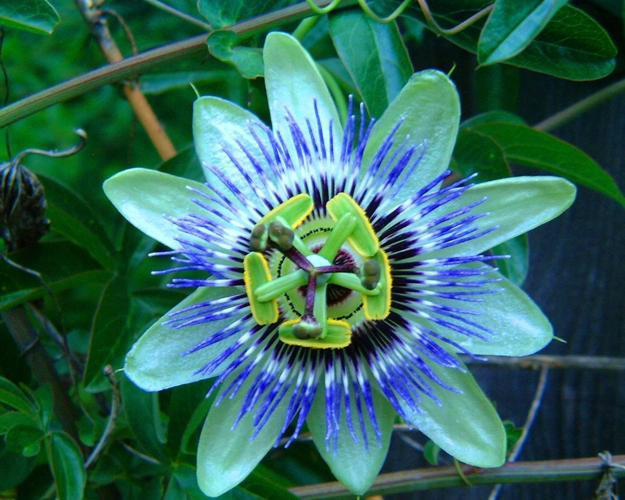

In [48]:
PIL.Image.open(str(doo[1]))


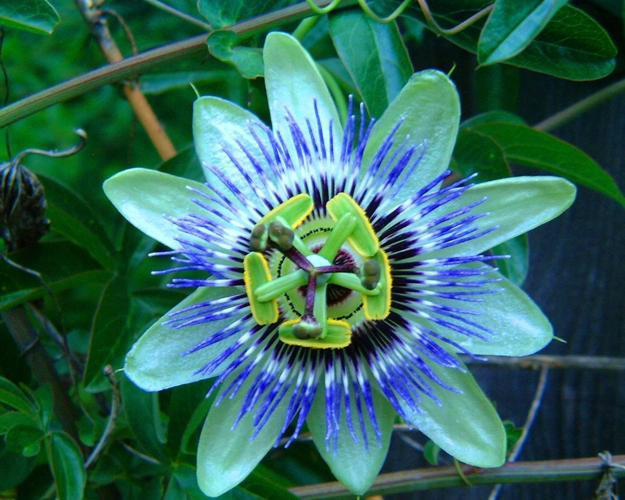

In [123]:
PIL.Image.open(str(doo[1]))


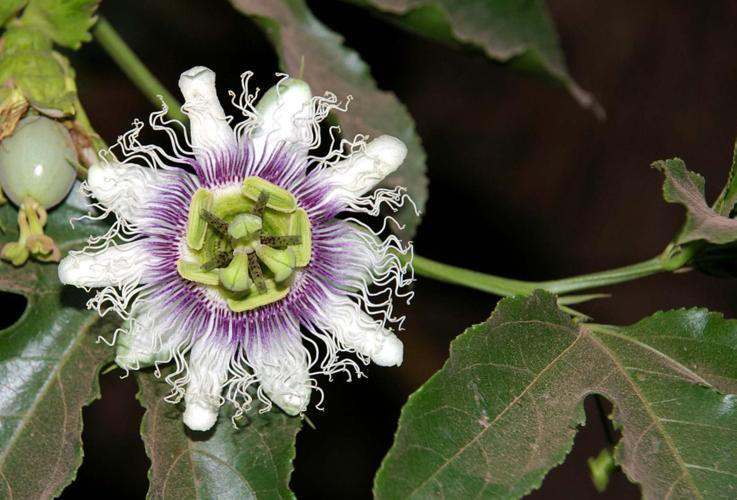

In [52]:
PIL.Image.open(str(doo[76]))


### 3.FORMATTING THE TRAINING DATA

In [12]:
X = []
#############################   resizing every image into 224 * 224


for image in doo:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(224, 224))    ####### opencv have imread which gives you numpy array
    X.append(resized_img)

In [13]:
len(X)

8189

In [14]:
len(Y)

8189

In [15]:
X = np.array(X)
y = np.array(Y)             #######  converetd list into numpy array

X.shape,y.shape

((8189, 224, 224, 3), (8189,))

In [ ]:
############   ONE HOT ENCODING THE LABEL TARGET VARIABLE  ##############

In [67]:
len(np.unique(Y))

102

In [82]:
import pandas as pd
Label = pd.Series(Y)
Label=pd.get_dummies(Label)
Label

,1,2,3,4,5,6,7,8,9,10,...,93,94,95,96,97,98,99,100,101,102
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
Labels=Label.to_numpy()
Labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [84]:
Labels.shape

(8189, 102)

### 4.TRAIN TEST SPLIT

In [85]:
####### SPLITTING DATA INTO TRAIN AND TEST

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Labels, random_state=0)

X_train_scaled = X_train / 255    ##### image scaling as to treat all images in the same manner
X_test_scaled = X_test / 255

X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape


((6141, 224, 224, 3), (6141, 102), (2048, 224, 224, 3), (2048, 102))

### 5.MODEL BUILDING

#### MODEL 1

In [86]:

#######  SETTING UP THE LAYERS OF THE NEURAL NETWORK

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,               
                   input_shape=(224,224,3),                          ######### INPUT SHAPE IS OF DIEMENION 224*224*3
                   pooling='avg',classes=102,                ###### DESCRIBES NUMBER OF CLASSES FOR RESNET TO CATEGORIZE
                   weights='imagenet')

for layer in pretrained_model.layers:             ####### FREEZING ALL THE LAYER AS IT MAKES WEIGHTS TO NON TRAINABLE  
        layer.trainable=False                                ### https://keras.io/guides/transfer_learning/

resnet_model.add(pretrained_model)     #### SETTING THE INITIAL LAYER AS THAT OF RESNET50
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))           #### this layer have 512 nodes
resnet_model.add(Dense(102, activation='softmax'))      ##### FINAL ACTIVATION FUNCTION USED IS SOFTMAX ARE WE ARE 
                                                        #### TO PREDICT MULTICLASS

resnet_model.summary()
                 


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_11 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_23 (Dense)             (None, 102)               52326     
Total params: 24,689,126
Trainable params: 1,101,414
Non-trainable params: 23,587,712
_________________________________________________________________


In [87]:
##############################    FITTING THE MODEL 


resnet_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

resnet_model.fit(X_train_scaled, y_train, 
             epochs=2)

Epoch 1/2
192/192 [==============================] - 463s 2s/step - loss: 4.6137 - accuracy: 0.0313
Epoch 2/2
192/192 [==============================] - 441s 2s/step - loss: 4.3933 - accuracy: 0.0510


In [122]:
###### shows high loss and low accuracy

In [ ]:
##########  TRAINING THE MODEL AGAIN WITH TWO MORE EPOCHS

resnet_model.fit(X_train_scaled, y_train, 
             epochs=3)

#### MODEL 2

In [ ]:


###############  CREATING MODEL WITHOUT ANY ENCODING ##############

In [35]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
labels1= label_encoder.fit_transform(y)

labels1, labels1.shape


(array([76, 76, 76, ..., 61, 61, 61], dtype=int64), (8189,))

In [89]:
Y

array([77, 77, 77, ..., 62, 62, 62], dtype=uint8)

In [90]:


from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, random_state=0)

X_train_scaled1 = X_train1 / 255
X_test_scaled1 = X_test1 / 255

X_train_scaled1.shape, y_train1.shape, X_test_scaled1.shape, y_test1.shape


((6141, 224, 224, 3), (6141,), (2048, 224, 224, 3), (2048,))

In [91]:
resnet_model1 = Sequential()

pretrained_model1= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=102,
                   weights='imagenet')
for layer in pretrained_model1.layers:
        layer.trainable=False

resnet_model1.add(pretrained_model1)
resnet_model1.add(Flatten())
resnet_model1.add(Dense(512, activation='relu'))
resnet_model1.add(Dense(1, activation='softmax'))

resnet_model1.summary()
                 


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_12 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 513       
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


In [92]:

resnet_model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

resnet_model1.fit(X_train_scaled1, y_train1, epochs=2)



Epoch 1/2
192/192 [==============================] - 437s 2s/step - loss: 0.0000e+00 - accuracy: 0.0047
Epoch 2/2
192/192 [==============================] - 444s 2s/step - loss: 0.0000e+00 - accuracy: 0.0042


In [ ]:
#########  TRAINING IT AGAIN FOR 2 MORE TIMES VALIDATION

resnet_model1.fit(X_train_scaled1, y_train1,validation_data=(X_test_scaled1,y_test1) epochs=2)

In [ ]:
### ONE HOT ENCODED SHOWS BETTER ACCURACY THAN NON-ENCODED ONE

### 6. IMAGE TRANSFORMS

#### MODEL 3

In [93]:
######## image augmentation 


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# construct the training image generator for data augmentation
aug = ImageDataGenerator(                                                 ##### all this denotes the different type
	rotation_range=20,                                                       ### of image transforms that is going to 
	zoom_range=0.15,                                                         ### be done on each of the training image
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")


######## CREATING A MODEL WHICH WILL BE TRAINED WITH IMAGE TRANSFORMATION

resnet_model12 = Sequential()

pretrained_model12= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=102,
                   weights='imagenet')


resnet_model12.add(pretrained_model12)
resnet_model12.add(Flatten())
resnet_model12.add(Dense(512, activation='relu'))
resnet_model12.add(Dense(102, activation='softmax'))

print(resnet_model12.summary())
                 
    

    


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_13 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_27 (Dense)             (None, 102)               52326     
Total params: 24,689,126
Trainable params: 24,636,006
Non-trainable params: 53,120
_________________________________________________________________
None


In [94]:
resnet_model12 

In [95]:
### We are using the ONE HOT ENCODED VALUES AS THE Y SET FOR THIS MODELLING AS IT SHOWS BETTER ACCURACY

X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((6141, 224, 224, 3), (6141, 102), (2048, 224, 224, 3), (2048, 102))

In [96]:
##############################    FITTING THE MODEL 
resnet_model12.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

resnet_model12.fit(aug.flow(X_train_scaled, y_train,batch_size=32),validation_data=(X_test_scaled,y_test), epochs=1)

192/192 [==============================] - 2604s 13s/step - loss: 3.4704 - accuracy: 0.2457 - val_loss: 5.0679 - val_accuracy: 0.0039


In [97]:
####### TRAINING THEM AGAIN

resnet_model12.fit(aug.flow(X_train_scaled, y_train,batch_size=32),validation_data=(X_test_scaled,y_test), epochs=6)


Epoch 1/6
192/192 [==============================] - 2500s 13s/step - loss: 1.1699 - accuracy: 0.6761 - val_loss: 5.9217 - val_accuracy: 0.0073
Epoch 2/6
192/192 [==============================] - 2417s 13s/step - loss: 0.7517 - accuracy: 0.7774 - val_loss: 9.9253 - val_accuracy: 0.0088
Epoch 3/6
192/192 [==============================] - 2428s 13s/step - loss: 0.5463 - accuracy: 0.8386 - val_loss: 3.6819 - val_accuracy: 0.2305
Epoch 4/6
192/192 [==============================] - 2570s 13s/step - loss: 0.4202 - accuracy: 0.8774 - val_loss: 1.5434 - val_accuracy: 0.6060
Epoch 5/6
192/192 [==============================] - 2523s 13s/step - loss: 0.3612 - accuracy: 0.8912 - val_loss: 1.4025 - val_accuracy: 0.6753
Epoch 6/6
192/192 [==============================] - 2423s 13s/step - loss: 0.3113 - accuracy: 0.9034 - val_loss: 0.9445 - val_accuracy: 0.7783


In [ ]:
### WITH TOTAL OF 7 EPOCHS TRAINING WITH IMAGE AUGEMENTATION[IMAGE TRANSFORMS] AND LEARNING RATE OF .001 BY DEFAULT
## ACCURACY IS AROUNF 77 PERCENTAGE

In [ ]:
///////////////////

### 7.CHANGING THE LEARNING RATES

#### MODEL 4 -  with learning rate of .01

In [98]:
######## CREATING A MODEL WHICH WILL BE TRAINED WITH IMAGE TRANSFORMATION AND DIFFERENT RATES

######## image augmentation 


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# construct the training image generator for data augmentation
aug = ImageDataGenerator(                                                 ##### all this denotes the different type
	rotation_range=20,                                                       ### of image transforms that is going to 
	zoom_range=0.15,                                                         ### be done on each of the training image
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")


######## CREATING A MODEL WHICH WILL BE TRAINED WITH IMAGE TRANSFORMATION AND DIFFERENT RATES

resnet_model123 = Sequential()

pretrained_model123= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=102,
                   weights='imagenet')


resnet_model123.add(pretrained_model12)
resnet_model123.add(Flatten())
resnet_model123.add(Dense(512, activation='relu'))
resnet_model123.add(Dense(102, activation='softmax'))

print(resnet_model12.summary())
                 
    

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_13 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_27 (Dense)             (None, 102)               52326     
Total params: 24,689,126
Trainable params: 24,636,006
Non-trainable params: 53,120
_________________________________________________________________
None


In [110]:
#######  using different learning rates

optimizer = tensorflow.keras.optimizers.Adam(lr=0.01) #### default learning rate is .001 fro ADAM, changing it to .01 
resnet_model123.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['categorical_accuracy'])

resnet_model123.fit(aug.flow(X_train_scaled, y_train,batch_size=32),validation_data=(X_test_scaled,y_test), epochs=5)

Epoch 1/5
192/192 [==============================] - 2377s 12s/step - loss: 5.1666 - categorical_accuracy: 0.0304 - val_loss: 10.5360 - val_categorical_accuracy: 0.0322
Epoch 2/5
192/192 [==============================] - 2274s 12s/step - loss: 3.9655 - categorical_accuracy: 0.0718 - val_loss: 51.9560 - val_categorical_accuracy: 0.0483
Epoch 3/5
192/192 [==============================] - 2527s 13s/step - loss: 3.6440 - categorical_accuracy: 0.0980 - val_loss: 4.0112 - val_categorical_accuracy: 0.0889
Epoch 4/5
192/192 [==============================] - 2342s 12s/step - loss: 3.4220 - categorical_accuracy: 0.1435 - val_loss: 222.7565 - val_categorical_accuracy: 0.0078
Epoch 5/5
192/192 [==============================] - 2414s 13s/step - loss: 3.2971 - categorical_accuracy: 0.1519 - val_loss: 7.1640 - val_categorical_accuracy: 0.0581


#### MODEL 5 -  with learning rate of .0001

In [112]:



######## image augmentation 


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# construct the training image generator for data augmentation
aug = ImageDataGenerator(                                                 ##### all this denotes the different type
	rotation_range=20,                                                       ### of image transforms that is going to 
	zoom_range=0.15,                                                         ### be done on each of the training image
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")


######## CREATING A MODEL WHICH WILL BE TRAINED WITH IMAGE TRANSFORMATION AND DIFFERENT RATES

resnet_model1234 = Sequential()

pretrained_model123= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=102,
                   weights='imagenet')


resnet_model1234.add(pretrained_model12)
resnet_model1234.add(Flatten())
resnet_model1234.add(Dense(512, activation='relu'))
resnet_model1234.add(Dense(102, activation='softmax'))

print(resnet_model12.summary())
                 
#######  using different learning rates

optimizer = keras.optimizers.Adam(lr=0.0001)             ###### default learning rate is .001 fro ADAM, changing it to .0001 
resnet_model1234.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['categorical_accuracy'])

resnet_model1234.fit(aug.flow(X_train_scaled, y_train,batch_size=32),validation_data=(X_test_scaled,y_test), epochs=5)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_13 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_27 (Dense)             (None, 102)               52326     
Total params: 24,689,126
Trainable params: 24,636,006
Non-trainable params: 53,120
_________________________________________________________________
None
Epoch 1/5
192/192 [==============================] - 2419s 13s/step - loss: 4.5750 - categorical_accuracy: 0.0450 - val_loss: 4.3496 - val_categorical_accuracy: 0.1025
Epoch 2/5
192/192 [==============================] - 2646s 14

### 8.TESTING THE MODEL



In [113]:
###### MODEL 3

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = resnet_model12.evaluate(X_test_scaled,y_test, batch_size=128)
print("test loss, test acc:", results)



Evaluate on test data
16/16 [==============================] - 132s 8s/step - loss: 4.8196 - accuracy: 0.0146
test loss, test acc: [4.819635391235352, 0.0146484375]


In [114]:
###### MODEL 5 WITH IMAGE TRANFORMS ABD LEARNING RATE SET TO .0001

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = resnet_model1234.evaluate(X_test_scaled,y_test, batch_size=128)
print("test loss, test acc:", results)



Evaluate on test data
16/16 [==============================] - 126s 7s/step - loss: 2.8514 - categorical_accuracy: 0.2725
test loss, test acc: [2.8513596057891846, 0.2724609375]


### 9. CONCLUSION

THE 5TH MODEL CREATED WITH IMAGE TRANSFORMS AND LEARNING RATE OF .0001 GAVE BETTER RESULTS WITH THE TEST SET
AND ONE HOT ENCODED LABEL VALUES IS BETTER THAN NON-ENCODING THE UNIQUE LABELS



PS: ONLY TRIED WITH 6-7 EPOCHS, AND WITH MORE EPOCHS ADN DIFFERNT LEARNING RATE, ANOTHER MODEL MAY PERFORM BETTER

###### SAMPLE TEST PREDICTION

In [115]:

print("Generate predictions for 3 samples")
predictions = resnet_model1234.predict(X_test_scaled[:3])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
predictions shape: (3, 102)


In [121]:
print(argmax(predictions[0]))    PREDICTS
print(argmax(predictions[1]))
print(argmax(predictions[2]))

59
50
64
